# 机器学习工程师纳米学位

## 毕业项目--侦测走神司机  开题报告

### 项目背景

本项目来自kaggle. 根据美国疾病控制中心机动车安全部门报道, 五分之一的汽车交通事故都是由于司机分神. 不幸的是, 这就意味着每年有425,000人因此受伤, 3000人因此死亡. 美国的State Farm保险公司希望通过测试仪表盘上的摄像头能否自动检测司机的走神行为来扩张这一令人担忧的统计数据, 并且更好地为他们的顾客提供保险服务. 本项目的数据集源于仪表盘摄像头中记录下的二维图像, 希望通过该图像来辨别出司机目前的行为.

我之所以会选择这个项目来作为毕业项目是因为, 首先, 计算机视觉是很大一块能让机器学习大展手脚的领域, 完整地昨晚此次项目定能学到不少知识; 其次, 该项目具有十分重要的社会意义, 若真的能够很好地检测出目前司机的行为, 并对走神的司机进行提醒或进行其他一系列相关工作, 都是关乎到司机包括行人生命安全的.

### 问题描述

给定的数据集是仪表盘摄像头上记录下的一系列二维图像, 目的是为司机的行为进行分类. 那么运用相关的计算机视觉技术以及卷积神经网络, 就可以为本项目构造出分类模型. 

### 数据或输入

本项目的[数据集](https://www.kaggle.com/c/state-farm-distracted-driver-detection/data)可从kaggle上直接下载, 共包括10种驾车时行为的共22424张RGB图片. 图片像素大小为480\*680, 以jpg形式储存. 每个图像都会通过一定程度的缩放后转化为一个具有三个channel的数据作为卷积神经网络的输入.

### 解决方法描述

将图像经过一定程度缩放后, 将数据集随机划分为训练集和验证集, 再对训练集进行一定程度的augmentation, 提高训练数据. 对所有数据进行归一化处理. 紧接着搭建神经网络, 开始分批投喂训练数据训练模型. 不断调整参数至达到预期准确率. 

### 评估标准

训练出的卷积神经网络预测出了图中司机在进行各个行为的概率, 结合每个图像都有一个唯一对应的正确标签, 可以使用多分类逻辑损失来作为模型分类能力的评估.具体公式如下: $$log loss = -\frac{1}{N}\sum_{i=1}^N\sum_{j=1}^My_{ij}\log(p_{ij}) $$其中$N$是测试集中图像的数量, $M$是图像类别的数量, $log$是自然对数, 当图像$i$属于类别$j$时$y_{ij}$等于1, 否则等于0, 另外$p_{ij}$ 表示图像$i$属于类别$j$的概率. 可见$logloss$越小表示模型的performance越好.

### 基准模型

将使用VGG16作为基准模型, 进行随后的调试和改进工作.VGG16包含了共16层的权重. 卷积层均由一个大小为3\*3步长为1的滤波器构成, 池化层则均进行一个大小为2\*2, 步长为2的最大池化操作. 整个模型结构为, 输入层-(卷积层-卷积层-池化层)\*2-(卷积层-卷积层-卷积层-池化层)\*3-全连接层-全连接层-全连接层-输出层.


### 项目设计

整个项目流程即为数据预处理-构建基准模型-尝试多种模型-模型调优-得出分类结果及结果评分.关于训练数据的基础信息及相关展示如下:

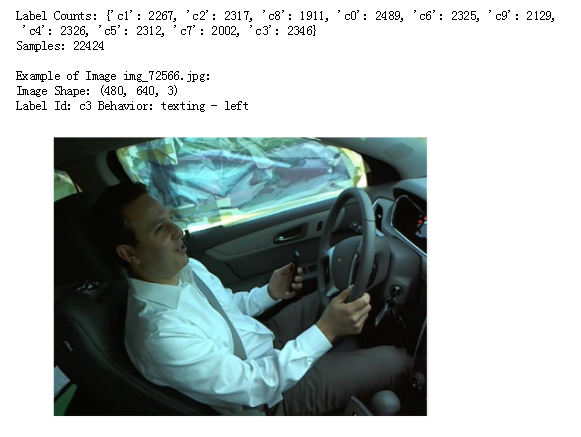

In [1]:
from IPython import display
display.Image('data_info.png')

数据与处理阶段需要进行的操作有图形的缩放等,而在尝试多种模型中会考虑ResNet等更加强大的模型.